<a href="https://colab.research.google.com/github/Teasotea/strategic_stability/blob/main/StratStabTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Load Data

In [ ]:
!pip install bertopic
!pip install bertopic[visualization]
!pip install bertopic[spacy]

     |████████████████████████████████| 20.6 MB 47.7 MB/s 
  Created wheel for wiki-ru-wordnet: filename=wiki_ru_wordnet-1.0.3-py3-none-any.whl size=20890443 sha256=0c944a879206dcd0beb07d8fb4843c56f9affe3951815bddc471d306255f3137
  Stored in directory: /root/.cache/pip/wheels/35/43/b7/7dc9d93394ea52e85730fde0ab446267f4855cb6c3a2a137ce
Successfully built wiki-ru-wordnet


In [ ]:
!pip install fasttext
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 13.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e0dd0763241b5480eb7947c0146c36f8791e561a12a20af31ee1558a79fdb05a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
import fasttext
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

import pickle
import pyLDAvis.sklearn
from collections import Counter
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

import re

%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
from bertopic import BERTopic

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data = pd.read_csv('strategic_data.csv')

In [ ]:
data.head()

,name,fulltext,database,source,date,issue
0,"США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...","США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...",Федеральные информагентства,РИА Новости. Все Новости,2020,14 октября
1,"США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...","США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...",Федеральные информагентства,РИА Новости. Главное,2020,14 октября
2,"США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...","США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...",Федеральные информагентства,РИА Новости. Международные новости,2020,14 октября
3,"США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...","США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВ...",Федеральные информагентства,РИА Новости. Оборона и безопасность,2020,14 октября
4,ЯДЕРНЫЕ АРСЕНАЛЫ,Источник: WebGround (webground.su)\nДата выпуска: 14.10.2020\nЗаглавие: ЯДЕРНЫЕ АРСЕНАЛЫ\nЯДЕРНЫ...,Зарубежные интернет-издания,WebGround (webground.su),2020,14 октября


#  Step 1: Exploratory Data Analysis

Важно понимать:
* какие поля
* сколько записей
* какие источники
* какие даты
* какая дополнительная информация

Сделай визуализации, которые помогут ознакомиться с набором данных.

## Analysis & Data Cleaning

In [ ]:
# Thus, we can see that data contains NULL values
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      3971 non-null   object
 1   fulltext  3969 non-null   object
 2   database  3965 non-null   object
 3   source    3965 non-null   object
 4   date      3949 non-null   object
 5   issue     3925 non-null   object
dtypes: object(6)
memory usage: 186.3+ KB


In [ ]:
# Remove the rows that contains NULL values
data2 = data.dropna()

In [ ]:
data2.duplicated().sum()

86

In [ ]:
# Drop duplicates
data2.drop_duplicates(inplace=True)

In [ ]:
# The date format is not comfortable to work with, let's convert it to Timestamp
data2.issue.value_counts()

12 января      138
28 июня         66
12 сентября     52
3 июня          34
4 июня          31
              ... 
11 августа       1
24 июня,         1
13 мая,          1
4 сентября       1
16 марта,        1
Name: issue, Length: 623, dtype: int64

In [ ]:
# We can see that some data contains fields in different format from others
data2[data2['issue'].astype(str) == '5 8,21']

,name,fulltext,database,source,date,issue
3692,Обозреватель Observer,Источник: Обозреватель\nДата выпуска: 1994\nНомер выпуска: 10-11\nЗаглавие: Обозреватель - Obser...,Федеральная пресса,Обозреватель,1994,"5 8,21"
3693,V. ВОЕННАЯ БЕЗОПАСНОСТЬ И ВОЕННАЯ ПОЛИТИКА РОССИИ,Источник: Обозреватель\nДата выпуска: 1994\nНомер выпуска: 5-8\nЗаглавие: V. ВОЕННАЯ БЕЗОПАСНОСТ...,Федеральная пресса,Обозреватель,1994,"5 8,21"


In [ ]:
# data2.date.value_counts()
wrong_date_list = ['подробнее', 'Мультипортал KM.RU', 'О Г Л А В Л Е Н И Е',
                   'Оригинальное сообщение', 'http://www.jstor','globalaffairs.ru', 
                   '3M22 «Циркон»', 'Оригинал публикации', 'Отправить по почте', '[4]', 
                   'задает вопрос', 'www.amic.ru', 'https://inosmi']

In [ ]:
# count how many rows do not contain date
data2.loc[data2['date'].isin(wrong_date_list)].shape

(56, 6)

In [ ]:
# Let's convert fields related with time to the same format
data2['issue'] = data2['issue'].apply(lambda x: '5 августа' if x=='5 8,21' else x)
data2['date'] = data2['date'].apply(lambda x: '2016' if x=='16' else x)
data2['date'] = data2['date'].apply(lambda x: '' if list(filter(x.startswith, wrong_date_list)) != [] else x)

In [ ]:
# this dictionary will help to convert date to Timestamp format
months = {'января':1, 'февраля':2, "марта":3, "апреля":4, "мая":5, "июня":6, "июля":7,
          "августа":8, "сентября":9, "октября":10, "ноября":11, "декабря":12}

In [ ]:
# Let's get the date and month separately
data2['month'] = data2['issue'].astype(str).apply(lambda x: months[re.sub(r'[^\w\s]', '', x).split()[1]]) #remove punctuation
data2['day'] = data2['issue'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x).split()[0])
# Now let's convert date info to Timestamp format
data2['full_date'] = data2.apply(lambda row: pd.Timestamp(year=int(row['date']), month=int(row['month']), 
                                                          day=int(row['day'])) if not row['date'] == '' else 
                                 #there are rows with missing date, but we can get it from text
                                  pd.Timestamp(row['fulltext'][row['fulltext'].find('Дата выпуска')+14:row['fulltext'].find('Дата выпуска')+24]), 
                                 axis = 1)
data2 = data2.drop(['date','month', 'day', 'issue'], axis=1)

In [ ]:
data2.full_date.describe() # view summary about dates

count                    3839
unique                   1159
top       2020-01-12 00:00:00
freq                      137
first     1992-02-14 00:00:00
last      2020-10-14 00:00:00
Name: full_date, dtype: object

In [ ]:
data2['datetime'] = pd.to_datetime(data2['full_date'],format='%d-%m-%Y %H:%M')

In [ ]:
data2['year'] = data2['datetime'].apply(lambda x: x.year)

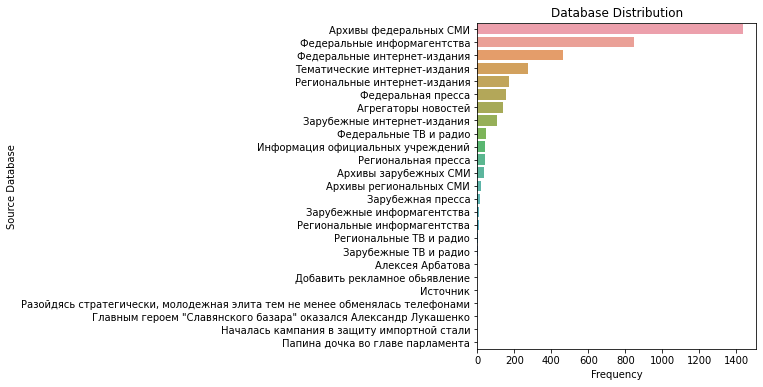

In [ ]:
# We can see how database sources are distributed
x_db = data2.database.value_counts()
y_db = x_db.sort_index()
plt.figure(figsize=(5,6))
sns.barplot(x_db, x_db.index, alpha=0.9)
plt.title("Database Distribution")
plt.xlabel('Frequency')
plt.ylabel('Source Database')
db_list = data2.database.value_counts().reset_index()['index'].tolist()
plt.yticks(np.arange(0, len(db_list), 1), db_list)
plt.show()

In [ ]:
# pd.set_option('display.max_rows', None) #viewing all data
# pd.reset_option('display.max_rows')
data2.source.value_counts()


Информационные агентства, часть 3                    426
РИА Новости. Горячая линия-1 (2000 - 10.2006)        295
РИА Новости. Все Новости (архив - 2019)              112
РИА Новости. Международные новости (архив - 2019)    110
РИА Новости. Главное (архив - 2019)                  110
                                                    ... 
Эксперт (PDF-версия)                                   1
Аргументы неделi                                       1
Аргументы неделi (PDF-версия)                          1
Newsvesti.ru                                           1
Зарубежная пресса, часть 2                             1
Name: source, Length: 863, dtype: int64

In [ ]:
fulltext_topics = ['Источник', 'Дата выпуска', 'Номер выпуска', 'Рубрика']
text_col_names = ['text_source','text_date','text_publ_num','rubric']
# As we can see, fulltext contains noisy info; Let's try to clean it a little bit
data2.fulltext.iloc[0]

'США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВА ЭТО БУДЕТ УЧИТЫВАТЬ - ЛАВРОВ\nИсточник: РИА Новости. Все Новости\nДата выпуска: 14.10.2020 12:35\nЗаглавие: США НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВА ЭТО БУДЕТ УЧИТЫВАТЬ - ЛАВРОВ\nСША НЕ ВКЛЮЧИЛИ В ПЕРЕГОВОРЫ РФ ПО СТРАТЕГИЧЕСКОЙ СТАБИЛЬНОСТИ ТЕМУ МИЛИТАРИЗАЦИИ КОСМОСА, МОСКВА ЭТО БУДЕТ УЧИТЫВАТЬ - ЛАВРОВ\nРИА НОВОСТИ'

In [ ]:
data2['fulltext'] = data2['fulltext'].apply(lambda x: x.replace("Issue date", "Дата выпуска") if x.find("Issue date") != -1 else x)
data2['fulltext'] = data2['fulltext'].apply(lambda x: x.replace('_YR', "Дата выпуска") if x.find('_YR') != -1 else x)
data2['fulltext'] = data2['fulltext'].apply(lambda x: x.replace('_TI', 'Заглавие') if x.find('_TI') != -1 else x)
data2['fulltext'] = data2['fulltext'].apply(lambda x: x.replace('Title', 'Заглавие') if x.find('Title') != -1 else x)
data2['fulltext'] = data2['fulltext'].apply(lambda x: x.replace('Source','Источник') if x.find('Source') != -1 else x)


In [ ]:
data2['text'] = data2['fulltext'].apply(lambda x: x[x.find('Заглавие: ') + len('Заглавие: ') :]) # get text from 'fulltext'
for i,j in zip(fulltext_topics, text_col_names):
  data2[j] = data2['fulltext'].apply(lambda x: x[x.find(i) + len(i) + 2 :x.find('\n', x.find(i))]if x.find(i) != -1 else np.nan)
data2.reset_index(drop=True, inplace = True)

In [ ]:
rubr_list = data2.rubric.value_counts()[:20].reset_index()['index'].tolist()
rubr_list = [re.sub(r'[^\w\s]', ' ', x).lower() for x in rubr_list]

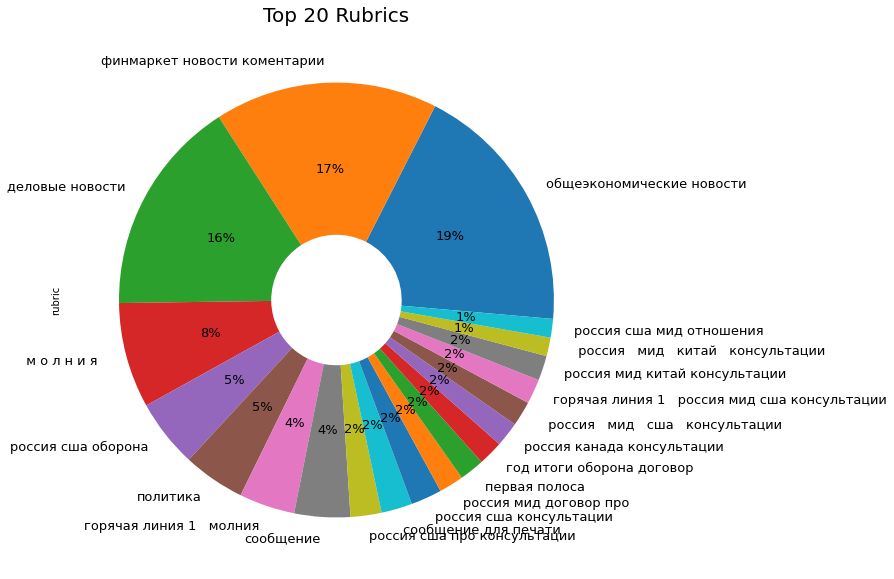

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 Rubrics', fontsize=20)
data2['rubric'].value_counts()[:20].plot(kind='pie', labels=rubr_list,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle=-5, 
                              textprops={'fontsize': 13})

In [ ]:
source_list = data2.text_source.value_counts()[:20].reset_index()['index'].tolist()
source_list = [re.sub(r'[^\w\s]', '', x) for x in source_list]

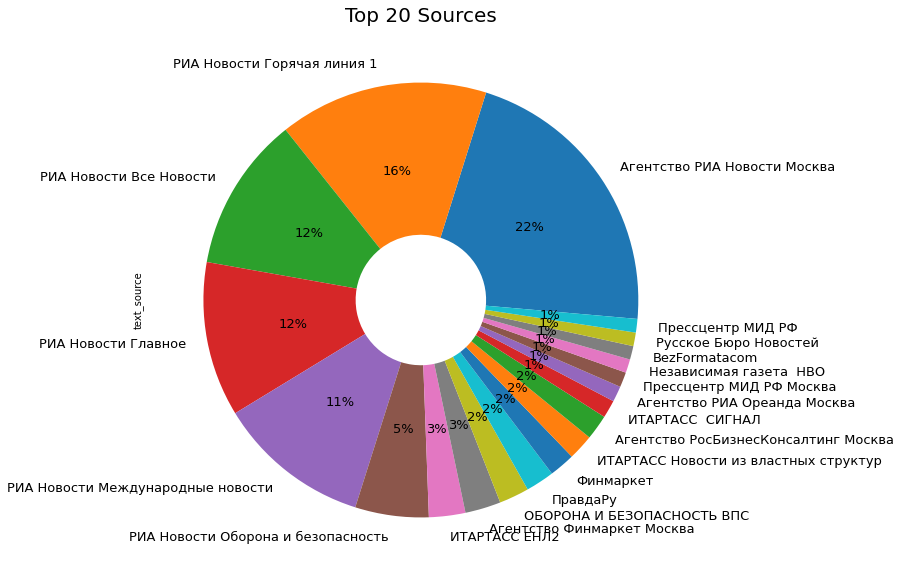

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 Sources', fontsize=20)
data2['text_source'].value_counts()[:20].plot(kind='pie', labels=source_list,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle=-5, 
                              textprops={'fontsize': 13})

In [ ]:
data2.info() # view summaries for all data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               3839 non-null   object        
 1   fulltext           3839 non-null   object        
 2   database           3839 non-null   object        
 3   source             3839 non-null   object        
 4   full_date          3839 non-null   datetime64[ns]
 5   text               3839 non-null   object        
 6   text_source        3837 non-null   object        
 7   text_date          3837 non-null   object        
 8   text_publ_num      521 non-null    object        
 9   rubric             1069 non-null   object        
 10  tokenized          3839 non-null   object        
 11  stopwords_removed  3839 non-null   object        
 12  pos_tags           3839 non-null   object        
 13  wordnet_pos        3839 non-null   object        
 14  lemmatiz

In [ ]:
data = data2.copy()

## Preprocessing
[article](https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28)

In [ ]:
punc = string.punctuation

In [ ]:
stop_words = set(stopwords.words('russian'))
stop_words.add('далее')
print(stop_words)

{'один', 'ее', 'вот', 'только', 'чуть', 'вдруг', 'всех', 'теперь', 'почти', 'ты', 'себя', 'ему', 'сейчас', 'нет', 'там', 'зачем', 'тот', 'ли', 'сам', 'но', 'из', 'будто', 'тоже', 'за', 'через', 'и', 'может', 'какой', 'мы', 'даже', 'так', 'о', 'для', 'далее', 'под', 'ничего', 'об', 'все', 'более', 'что', 'по', 'то', 'с', 'вас', 'вы', 'про', 'какая', 'тут', 'три', 'на', 'конечно', 'в', 'они', 'чтобы', 'этот', 'им', 'было', 'разве', 'без', 'всегда', 'этого', 'хорошо', 'во', 'свою', 'будет', 'его', 'него', 'ней', 'мой', 'при', 'от', 'ни', 'нее', 'тем', 'была', 'совсем', 'опять', 'здесь', 'два', 'мне', 'такой', 'чем', 'когда', 'эту', 'меня', 'нас', 'он', 'много', 'да', 'лучше', 'потому', 'них', 'к', 'моя', 'наконец', 'куда', 'вам', 'хоть', 'я', 'а', 'где', 'или', 'тебя', 'до', 'том', 'как', 'были', 'эти', 'раз', 'иногда', 'всего', 'уже', 'кто', 'после', 'есть', 'уж', 'можно', 'того', 'больше', 'всю', 'другой', 'бы', 'был', 'ж', 'чего', 'над', 'ведь', 'этом', 'еще', 'себе', 'их', 'со', 'быть

In [ ]:
stemmer = SnowballStemmer("russian") 

In [ ]:
# re.sub(r'[^\w\s]', '', x)
data2['tokenized'] = data2['text'].apply(word_tokenize).apply(lambda x: [re.sub(r'[^\w\s]', '', word.lower()) for word in x if word not in punc])
data2['tokenized'] = data2['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# data2['pos_tags'] = data2['tokenized'].apply(nltk.tag.pos_tag, lang = 'rus')

In [ ]:
data2['lemmatized'] = data2['tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
data2.lemmatized

0       [сша, не, включ, в, переговор, рф, по, стратегическ, стабильн, тем, милитаризац, космос, москв, ...
1       [сша, не, включ, в, переговор, рф, по, стратегическ, стабильн, тем, милитаризац, космос, москв, ...
2       [сша, не, включ, в, переговор, рф, по, стратегическ, стабильн, тем, милитаризац, космос, москв, ...
3       [сша, не, включ, в, переговор, рф, по, стратегическ, стабильн, тем, милитаризац, космос, москв, ...
4       [ядерн, арсенал, ядерн, арсенал, биллингсл, снв-3, наступательн, вооружен, взаимн, заморозк, ряб...
                                                       ...                                                 
3834    [военно-политическ, стабильн, xxi, век, он, должн, стро, на, соблюден, принцип, равн, безопасн, ...
3835    [точк, перехват, противоракетн, оборон, как, политическ, аргумент, росс, белорусс, последн, врем...
3836    [совещан, у, президент, м, о, с, к, в, а., борис, ельцин, провел, сегодн, совещан, с, член, сове...
3837    [праздник, ракетчик,

## Visualisation
https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [ ]:
data2['lemma_str'] = [' '.join(map(str,l)) for l in data2['lemmatized']]

In [ ]:
data2['tok_str'] = [' '.join(map(str,l)) for l in data2['tokenized']]

In [ ]:
data2['word_count'] = data2['lemmatized'].apply(lambda x: len(str(x).split()))
data2['word_len'] = data2['lemma_str'].astype(str).apply(len)

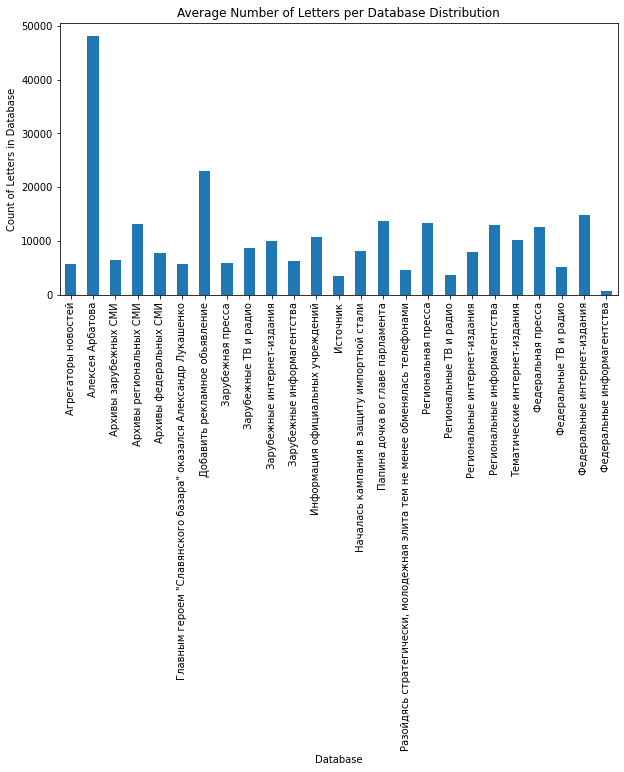

In [ ]:
letter_avg = data2.groupby('database')['word_len'].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Database')
plt.ylabel('Count of letters in Database')
plt.title('Average Number of letters per Database Distribution')
plt.show()

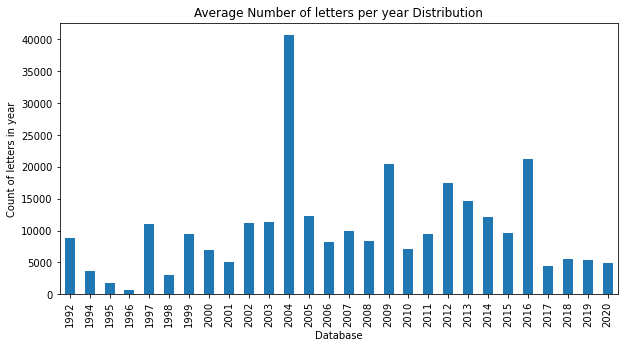

In [ ]:
letter_avg = data2.groupby('year')['word_len'].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Database')
plt.ylabel('Count of letters in year')
plt.title('Average Number of letters per year Distribution')
plt.show()

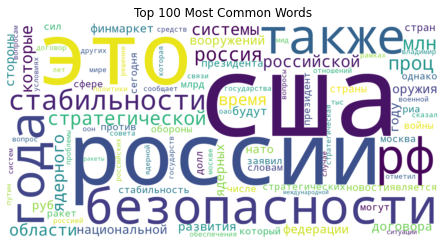

In [ ]:
allwords = [w for wordlist in data2['tokenized'] for w in wordlist]
mostcommon = FreqDist(allwords).most_common(100)[1:]
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join([i[0] for i in mostcommon]))
fig = plt.figure(facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.tight_layout(pad=0)
plt.show()

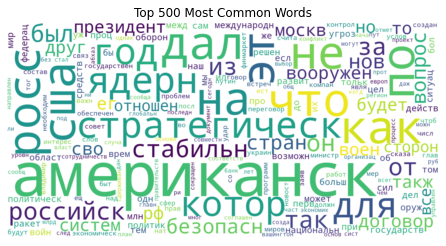

In [ ]:
alllems = [w for wordlist in data2['lemmatized'] for w in wordlist]
mostcommon = FreqDist(alllems).most_common(500)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join([i[0] for i in mostcommon]))
fig = plt.figure(facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 500 Most Common Words')
plt.tight_layout(pad=0)
plt.show()

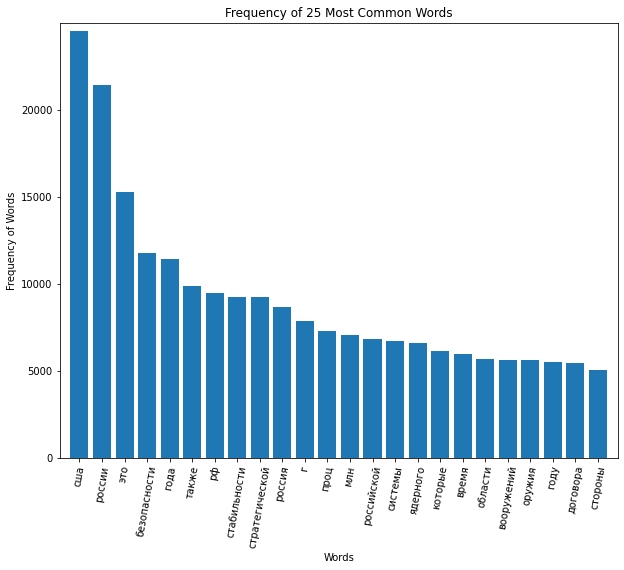

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)[1:]
x, y = zip(*mostcommon_small)
plt.figure(figsize=(10,8))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words')
plt.ylabel('Frequency of Words')
plt.xticks(rotation=80)
plt.title('Frequency of 25 Most Common Words')
plt.show()

# Step 2: Topic Modelling

### build 3 models

In [ ]:
text_model = BERTopic(language="Russian",verbose=True)
lem_model = BERTopic(language="Russian",verbose=True)
tok_model = BERTopic(language="Russian",verbose=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               3839 non-null   object        
 1   fulltext           3839 non-null   object        
 2   database           3839 non-null   object        
 3   source             3839 non-null   object        
 4   full_date          3839 non-null   datetime64[ns]
 5   text               3839 non-null   object        
 6   text_source        3837 non-null   object        
 7   text_date          3837 non-null   object        
 8   text_publ_num      521 non-null    object        
 9   rubric             1069 non-null   object        
 10  tokenized          3839 non-null   object        
 11  stopwords_removed  3839 non-null   object        
 12  pos_tags           3839 non-null   object        
 13  wordnet_pos        3839 non-null   object        
 14  lemmatiz

In [ ]:
text_docs = data2.text.to_list()
lem_docs = data2.lemma_str.to_list()
tok_docs = data2.tok_str.to_list()

In [ ]:
text_topics, text_probabilities = text_model.fit_transform(text_docs)
lem_topics, lem_probabilities = lem_model.fit_transform(lem_docs)
tok_topics, tok_probabilities = tok_model.fit_transform(tok_docs)

Batches:   0%|          | 0/120 [00:00<?, ?it/s]

2022-05-23 17:44:04,460 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core

Batches:   0%|          | 0/120 [00:00<?, ?it/s]

2022-05-23 17:52:18,925 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core

Batches:   0%|          | 0/120 [00:00<?, ?it/s]

2022-05-23 17:59:51,794 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core

### save pickles

In [ ]:
from pathlib import Path
from google.colab import drive

drive.mount('/content/gdrive')

GDRIVE = '/content/gdrive/MyDrive/stratStab'
WORKDIR = GDRIVE

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pd.to_pickle(text_model, WORKDIR+"text_model.pkl")
pd.to_pickle(lem_model, WORKDIR+"lem_model.pkl")
pd.to_pickle(tok_model, WORKDIR+"tok_model.pkl")

In [ ]:
text_model.get_topic_freq().head(11)

,Topic,Count
0,-1,1095
1,0,165
2,1,78
3,2,75
4,3,59
5,4,57
6,5,50
7,6,47
8,7,43
9,8,40


In [ ]:
tok_model.get_topic(-1)

[('сша', 0.00733291005673713),
 ('это', 0.00616905365621456),
 ('россии', 0.005836183651387035),
 ('стратегической', 0.004890056197952514),
 ('стабильности', 0.0045910584283074835),
 ('ядерного', 0.00446565381057913),
 ('ракет', 0.004398525465468777),
 ('вооружений', 0.004211668612872635),
 ('ядерных', 0.004067838915299283),
 ('россия', 0.004028605576865252)]

In [ ]:
tok_model.visualize_topics()

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning:

`np.bool` is a deprecated alias f

In [ ]:
tok_model.visualize_barchart()

In [ ]:
lem_model.visualize_barchart()

In [ ]:
text_model.visualize_barchart()

In [ ]:
tok_model.visualize_heatmap()

/usr/local/lib/python3.7/dist-packages/plotly/express/_imshow.py:354: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
top_model = BERTopic(nr_topics=20) 